In [167]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas  as pd
from io import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics


### Import all the libraries required

In [168]:
df = pd.read_csv(r'C:\Users\MY PC\.ipynb_checkpoints\Product_Categorisation\data.csv')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


## Print the first 5 rows of the dataframe

In [169]:
df.shape

(20000, 15)

## Dimensions of the dataframe

In [170]:
from io import StringIO
col = ['product_category_tree', 'description']

### Filter out the columns needed for our dataframe

In [171]:
df = df[col]

## Change the columns of the dataframe

In [172]:
df = df[pd.notnull(df['description'])]

### keep only the rows with non-null values of description

In [173]:
df.columns = ['product_category_tree', 'description']

## assign the columns to the dataframe

In [174]:
df['category_id'] = df['product_category_tree'].factorize()[0]

## assign category_id to all unique categories

In [175]:
category_id_df = df[['product_category_tree', 'category_id']].drop_duplicates().sort_values('category_id')

## drop duplicates from the dataframe

In [176]:
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'product_category_tree']].values)
df.head()

,product_category_tree,description,category_id
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,2
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,3


####  create a dictionary to store the values

In [177]:
df['category']=df['product_category_tree'].str.replace(' ','')
df

,product_category_tree,description,category_id,category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,"[""Clothing>>Women'sClothing>>Lingerie,Sleep&Sw..."
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1,"[""Furniture>>LivingRoomFurniture>>SofaBeds&Fut..."
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,2,"[""Footwear>>Women'sFootwear>>Ballerinas>>AWBel..."
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,"[""Clothing>>Women'sClothing>>Lingerie,Sleep&Sw..."
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,3,"[""PetSupplies>>Grooming>>Skin&CoatCare>>Shampo..."
...,...,...,...,...
19995,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,6461,"[""BabyCare>>Baby&KidsGifts>>Stickers>>WallDesi..."
19996,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,6460,"[""BabyCare>>Baby&KidsGifts>>Stickers>>Wallmant..."
19997,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,"[""BabyCare>>Baby&KidsGifts>>Stickers>>EliteCol..."
19998,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,"[""BabyCare>>Baby&KidsGifts>>Stickers>>EliteCol..."


# The Main Motive is to now figure out the primary category from the tree

In [178]:
df['category']=df['product_category_tree'].str.partition('>>')[0]
df

,product_category_tree,description,category_id,category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,"[""Clothing"
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1,"[""Furniture"
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,2,"[""Footwear"
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,"[""Clothing"
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,3,"[""Pet Supplies"
...,...,...,...,...
19995,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,6461,"[""Baby Care"
19996,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,6460,"[""Baby Care"
19997,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,"[""Baby Care"
19998,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,"[""Baby Care"


## This is the process of making it

In [179]:
df['category']=df['category'].str.replace('"','')
df

,product_category_tree,description,category_id,category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,[Clothing
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1,[Furniture
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,2,[Footwear
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,[Clothing
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,3,[Pet Supplies
...,...,...,...,...
19995,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,6461,[Baby Care
19996,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,6460,[Baby Care
19997,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,[Baby Care
19998,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,[Baby Care


## This is the process of making it

In [180]:
df['category']=df['category'].str.replace('[','')
df

,product_category_tree,description,category_id,category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,Clothing
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1,Furniture
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,2,Footwear
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,Clothing
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,3,Pet Supplies
...,...,...,...,...
19995,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,6461,Baby Care
19996,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,6460,Baby Care
19997,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,Baby Care
19998,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,Baby Care


## This is the process of making it

In [181]:
df['category']=df['category'].str.replace(']','')
df

,product_category_tree,description,category_id,category
0,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,Clothing
1,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1,Furniture
2,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,2,Footwear
3,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,0,Clothing
4,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,3,Pet Supplies
...,...,...,...,...
19995,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,6461,Baby Care
19996,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,6460,Baby Care
19997,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,Baby Care
19998,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,6459,Baby Care


## This is the process of making it

In [182]:
df['category']=df['category'].str.replace('&','')

## This is the process of making it

In [183]:
df['category']=df['category'].str.replace(',','')

## This is the process of making it

In [184]:
df=df.drop(['product_category_tree'],axis = 1)
df

,description,category_id,category
0,Key Features of Alisha Solid Women's Cycling S...,0,Clothing
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,1,Furniture
2,Key Features of AW Bellies Sandals Wedges Heel...,2,Footwear
3,Key Features of Alisha Solid Women's Cycling S...,0,Clothing
4,Specifications of Sicons All Purpose Arnica Do...,3,Pet Supplies
...,...,...,...
19995,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,6461,Baby Care
19996,Buy Wallmantra Large Vinyl Stickers Sticker fo...,6460,Baby Care
19997,Buy Elite Collection Medium Acrylic Sticker fo...,6459,Baby Care
19998,Buy Elite Collection Medium Acrylic Sticker fo...,6459,Baby Care


## This is the final result where we have the primary cateogry found out

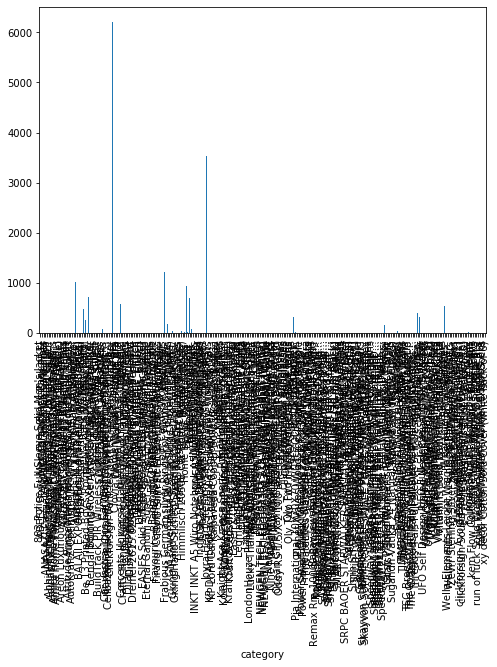

In [185]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('category').description.count().plot.bar(ylim=0)
plt.show()

## Visualising the data based on the category and it's frequency along y-axis

In [186]:
tfidf = TfidfVectorizer(sublinear_tf= True, #use a logarithmic form for frequency
                       min_df = 5, #minimum numbers of documents a word must be present in to be kept
                       norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                       ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                       stop_words ='english') #to remove all common pronouns to reduce the number of noisy features

### using TF-IDF to create the  model

In [187]:
features = tfidf.fit_transform(df.description).toarray()
labels = df.category_id
features.shape

(19998, 26910)

# create an array based on logarithmic values to be passed to models for training and testing

In [188]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '["883 Police Full Sleeve Solid Men's Jacket"]':
  . Most correlated unigrams:
. riding
. police
  . Most correlated bigrams:
. jacket additional
. black fabric
# '["ABEEZ Boys, Men, Girls (Black, Pack of 1)"]':
  . Most correlated unigrams:
. wrist
. bands
  . Most correlated bigrams:
. black pack
. size fit
# '["ANAND ARCHIES Girls Flats"]':
  . Most correlated unigrams:
. archies
. anand
  . Most correlated bigrams:
. pu type
. girls flats
# '["ANAND ARCHIES Girls Wedges"]':
  . Most correlated unigrams:
. archies
. anand
  . Most correlated bigrams:
. specifications anand
. pu type
# '["ANASAZI Casual 3/4 Sleeve Solid Women's Top"]':
  . Most correlated unigrams:
. gentle
. anasazi
  . Most correlated bigrams:
. anasazi casual
. specifications anasazi


KeyboardInterrupt: 

## Word(unigrams and bigrams) which are very similar to a particular description of a product

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Split the data into train and test set to fit them into models

In [190]:
print(clf.predict(count_vect.transform(["Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Black, Red,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 2 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTGHT_11 In the Box 2 shorts"])))

['Clothing ']


# testing the model for a particular input and guess what we got it right I
# It predicted correctly

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
F:\anaconda3pkd\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this trai

## Find out the accuracy of different algorithms like RnadonForestClassifier,Naive bayes and Support Vector Machine

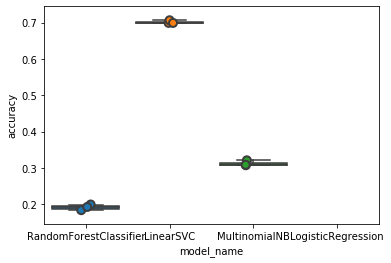

In [195]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


# Visualising the data using boxplot and hece we find out that LinearSVC algorithm gives the highest accuracy with around 0.7
## Let us find out  their exact values 

In [196]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.702020
LogisticRegression             NaN
MultinomialNB             0.312131
RandomForestClassifier    0.191469
Name: accuracy, dtype: float64

## So yeah there we got the actual value which has on overall accuracy of 0.702020 and hence it gives the highest accuracy among all